## Übung 6 - Morphologische Filter

**Team-Mitglied 1:** Pascal Kaimer </br>
**Team-Mitglied 2:** Dominik Müller </br>
**Team-Mitglied 3:** Phillipe Zimmermann

In [109]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numba.np.arrayobj import np_array

from my_lib import show_comparison
from skimage.morphology import disk


cactus = np.array(cv2.imread("data/cactus.jpg", cv2.IMREAD_GRAYSCALE), dtype=int)
dots = np.array(cv2.imread("data/dots.jpg", cv2.IMREAD_GRAYSCALE), dtype=int)
edge = np.array(cv2.imread("data/edge.jpg", cv2.IMREAD_GRAYSCALE), dtype=int)
fhorn = np.array(cv2.imread("data/fhorn.jpg", cv2.IMREAD_GRAYSCALE), dtype=int)

In [110]:

def erode(img, filter, iter_num):
    border = filter.shape[0] // 2
    for _ in range(iter_num):
        eroded_img = np.empty_like(img)
        for l in range(img.shape[0]):
            for c in range(img.shape[1]):
                min_vals = []
                for k in range(-border, border + 1):
                    for m in range(-border, border + 1):
                        if 0 <= l + k < img.shape[0] and 0 <= c + m < img.shape[1]:
                            f_val = filter[k + border][m + border]
                            if f_val is not None:
                                min_vals.append(img[l + k][c + m] - f_val)
                eroded_img[l][c] = max(min(min_vals), 0) if min_vals else img[l][c]
        img = eroded_img.copy()
    return img

def dilate(img, filter, iter_num):
    border = filter.shape[0] // 2
    for _ in range(iter_num):
        dilated_img = np.empty_like(img)
        for l in range(img.shape[0]):
            for c in range(img.shape[1]):
                max_vals = []
                for k in range(-border, border + 1):
                    for m in range(-border, border + 1):
                        if 0 <= l + k < img.shape[0] and 0 <= c + m < img.shape[1]:
                            f_val = filter[k + border][m + border]
                            if f_val is not None:
                                max_vals.append(img[l + k][c + m] + f_val)
                dilated_img[l][c] = min(max(max_vals), 255) if max_vals else img[l][c]
        img = dilated_img.copy()
    return img



In [111]:

#Filter

small_filter = np.array([
    [None, 1, None],
    [1, 5, 1],
    [None, 1, None],
])

#arrow
arrow_filter = np.array([
    [0, 0, 1, 0, 1],
    [0, 1, 1, 1, 0],
    [1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0]
])


#chessboard
chessboard_filter = np.array([
    [1, 0, 1, 0, 1],
    [0, 1, 0, 1, 0],
    [1, 0, 1, 0, 1],
    [0, 1, 0, 1, 0],
    [1, 0, 1, 0, 1]
])


#qr
qr_filter = np.array([
    [1, 1, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [0, 0, 1, 0, 0],
    [1, 0, 0, 0, 1],
    [1, 1, 0, 1, 1]
])


#disk
disk_filter = disk(2)



# dilate

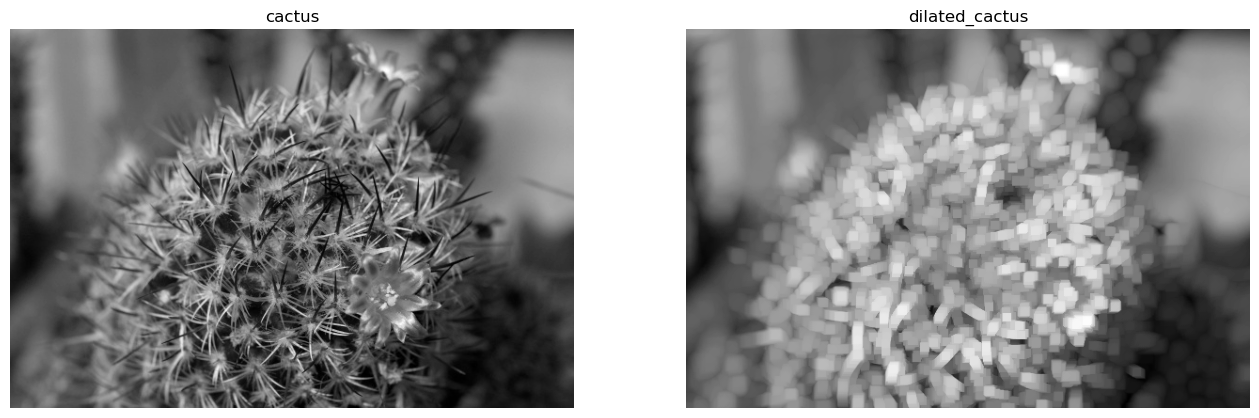

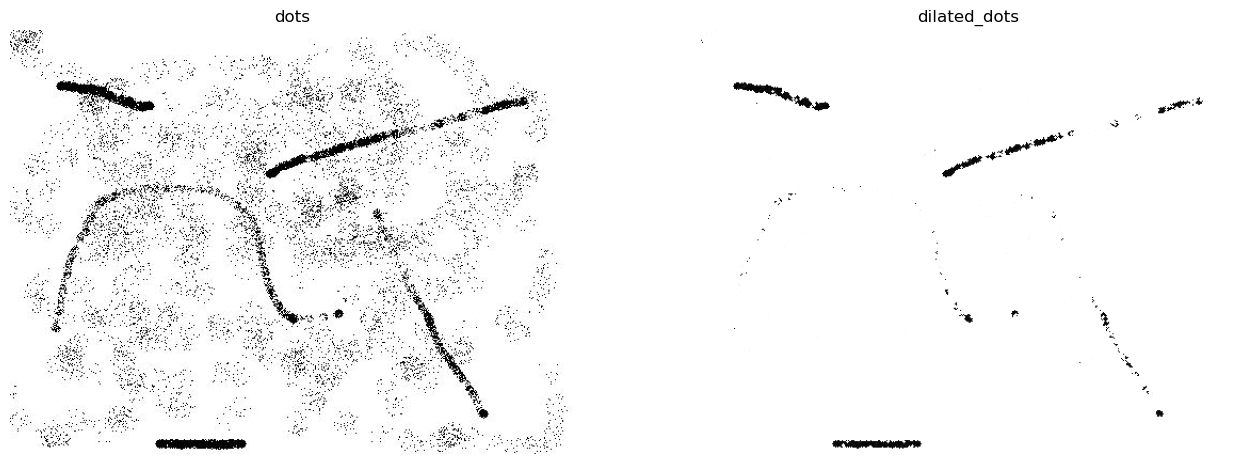

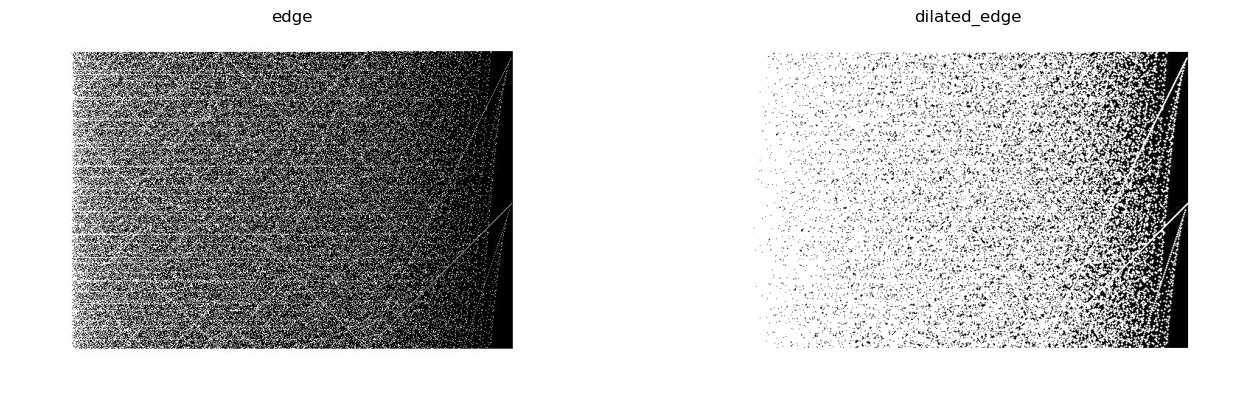

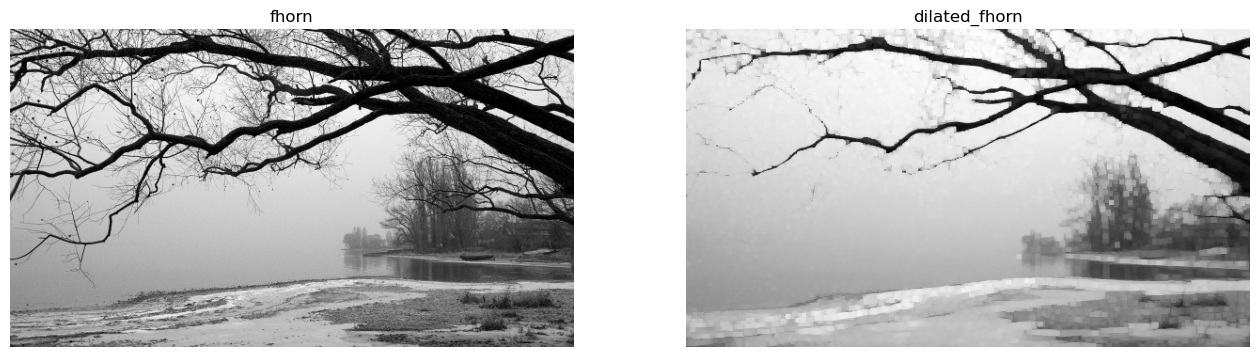

In [112]:
dilated_cactus = dilate(cactus, arrow_filter, 2)
show_comparison(cactus, dilated_cactus, "cactus", "dilated_cactus")

dilated_dots = dilate(dots, small_filter, 1)
show_comparison(dots, dilated_dots, "dots", "dilated_dots")

dilated_edge = dilate(edge, small_filter, 1)
show_comparison(edge, dilated_edge, "edge", "dilated_edge")

dilated_fhorn = dilate(fhorn, disk_filter, 1)
show_comparison(fhorn, dilated_fhorn, "fhorn", "dilated_fhorn")


## erode

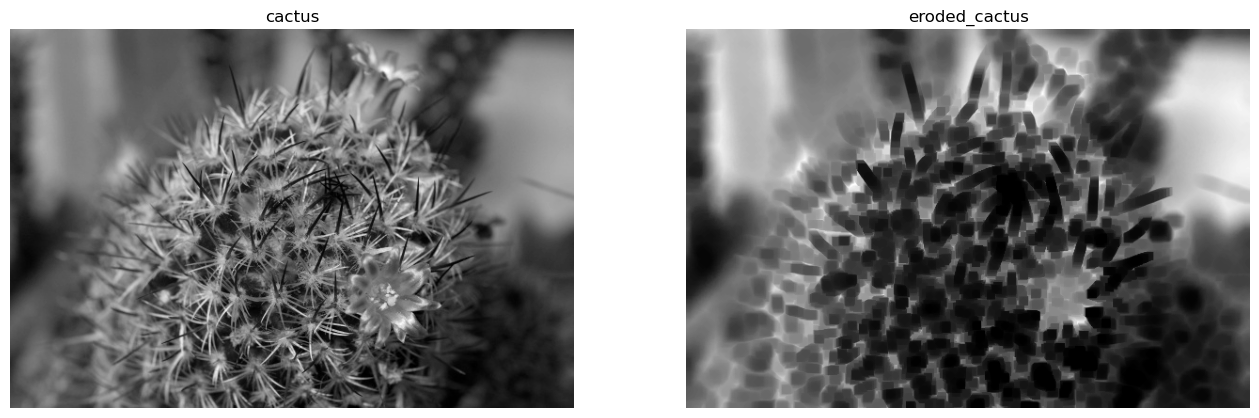

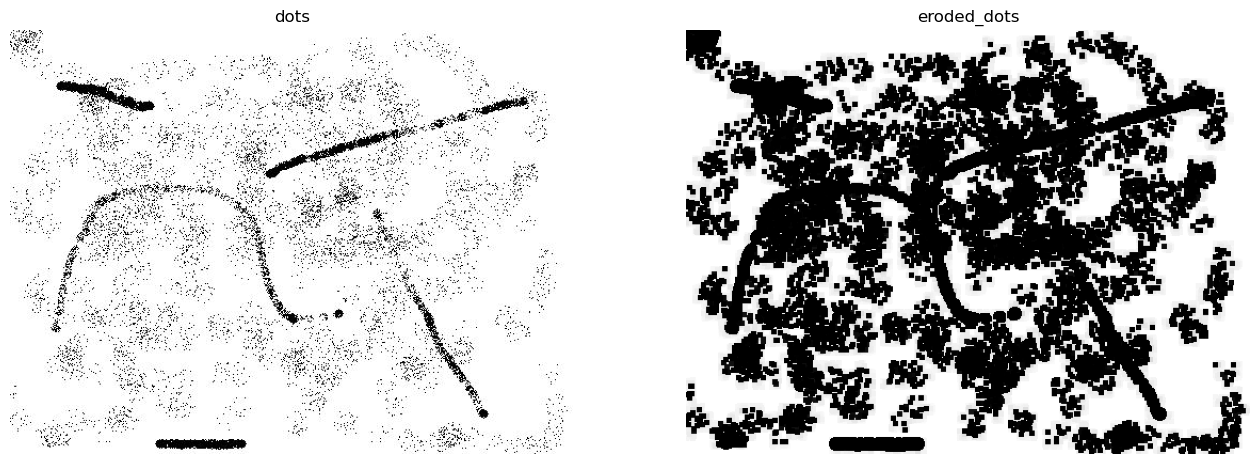

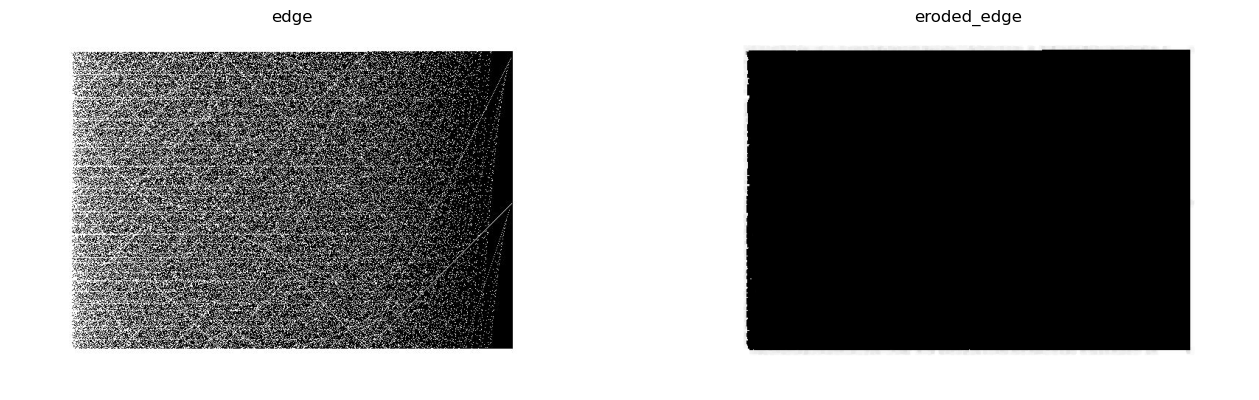

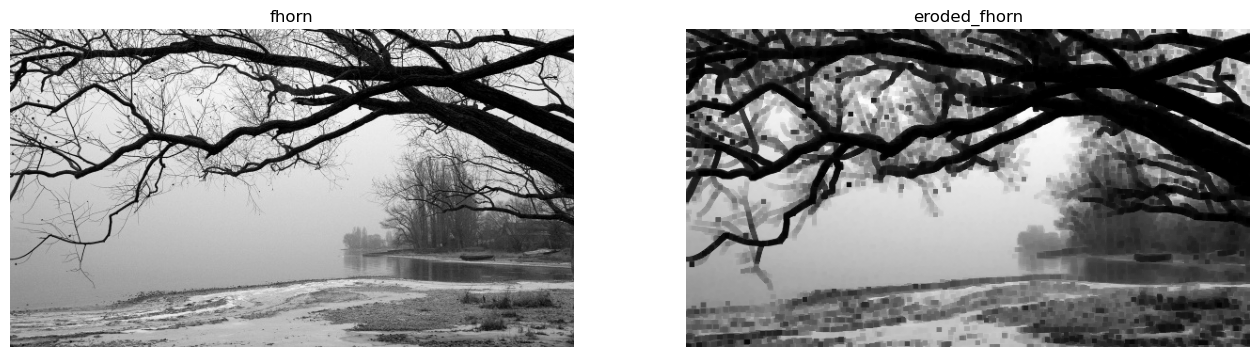

In [113]:
eroded_cactus = erode(cactus, disk_filter, 2)
show_comparison(cactus, eroded_cactus, "cactus", "eroded_cactus")

eroded_dots = erode(dots, qr_filter, 1)
show_comparison(dots, eroded_dots, "dots", "eroded_dots")

eroded_edge = erode(edge, chessboard_filter, 1)
show_comparison(edge, eroded_edge, "edge", "eroded_edge")

eroded_fhorn = erode(fhorn, arrow_filter, 1)
show_comparison(fhorn, eroded_fhorn, "fhorn", "eroded_fhorn")
